**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Initial Analysis on the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.drop(["embarked", "class", "alive"], axis = 1, inplace = True)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


**Exploratory Data Analysis(EDA)**

In [8]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
#df.isnull().sum() #show all nulls

In [9]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [10]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

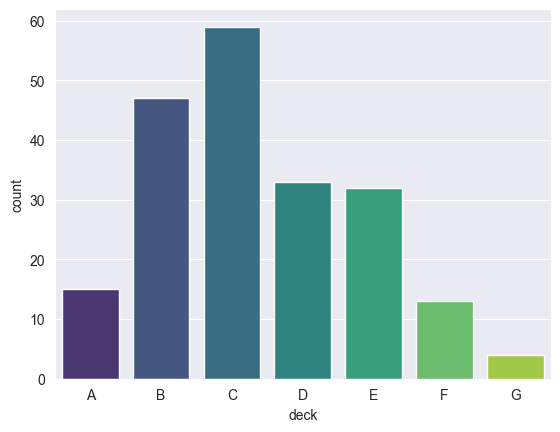

In [11]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis")

<Axes: xlabel='deck', ylabel='count'>

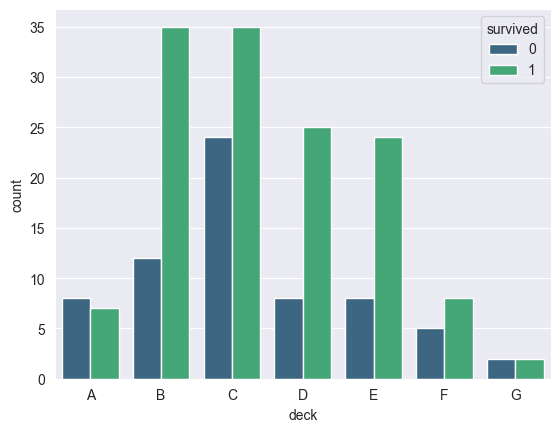

In [12]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", hue= "survived", data = df, palette = "viridis")

In [13]:
df.drop(["deck"], axis = 1, inplace = True)

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

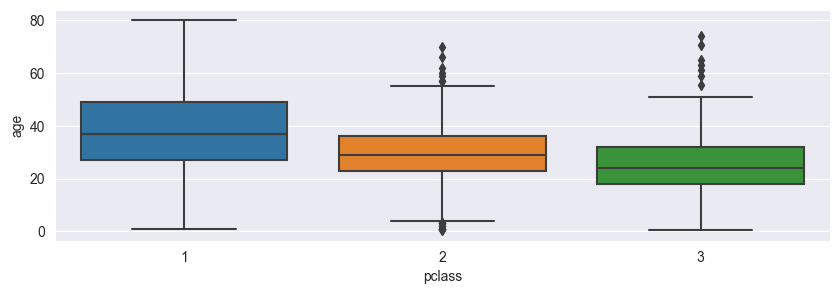

In [15]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = "pclass", y = "age", data = df)

In [16]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

In [17]:
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [18]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [19]:
df.dropna(inplace = True)

In [20]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

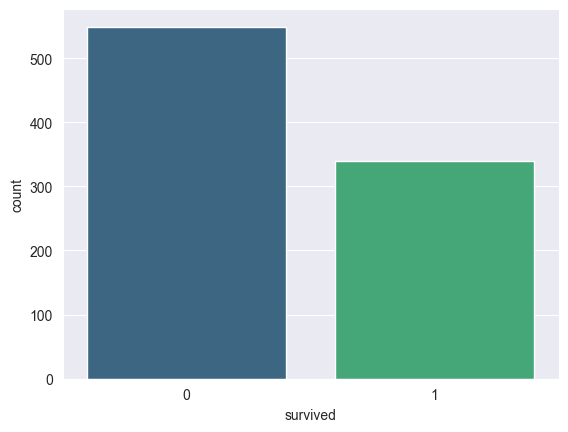

In [21]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")

In [22]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

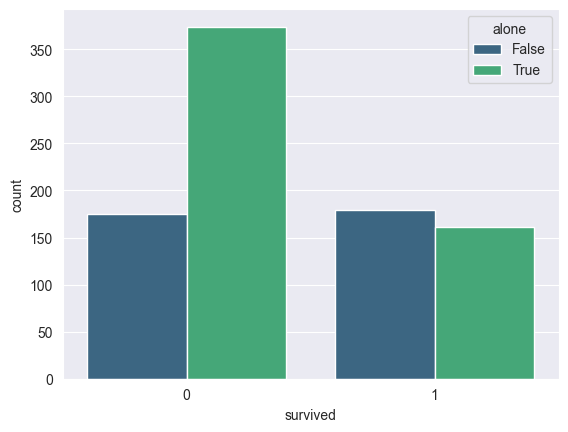

In [23]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "alone", data = df, palette = "viridis")

<Axes: xlabel='survived', ylabel='count'>

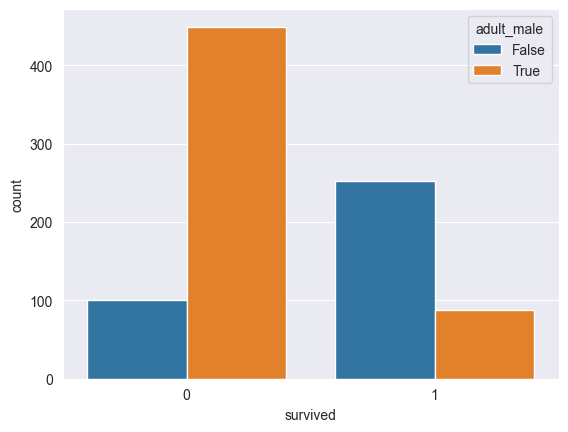

In [24]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "adult_male", data = df)

<Axes: xlabel='survived', ylabel='count'>

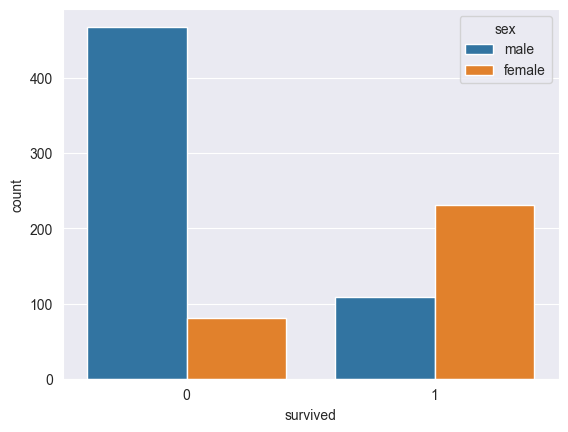

In [25]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "sex", data = df)

<Axes: xlabel='survived', ylabel='count'>

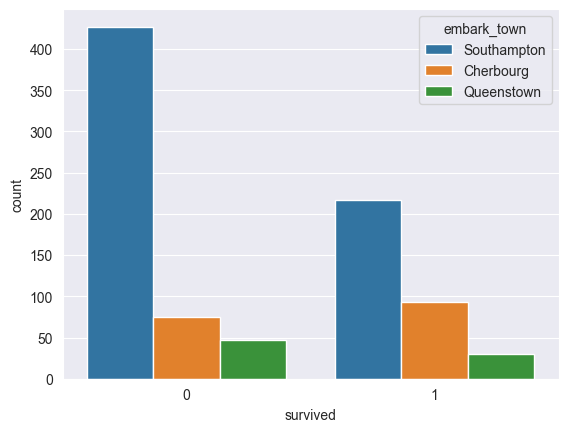

In [26]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "embark_town", data = df)

In [27]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

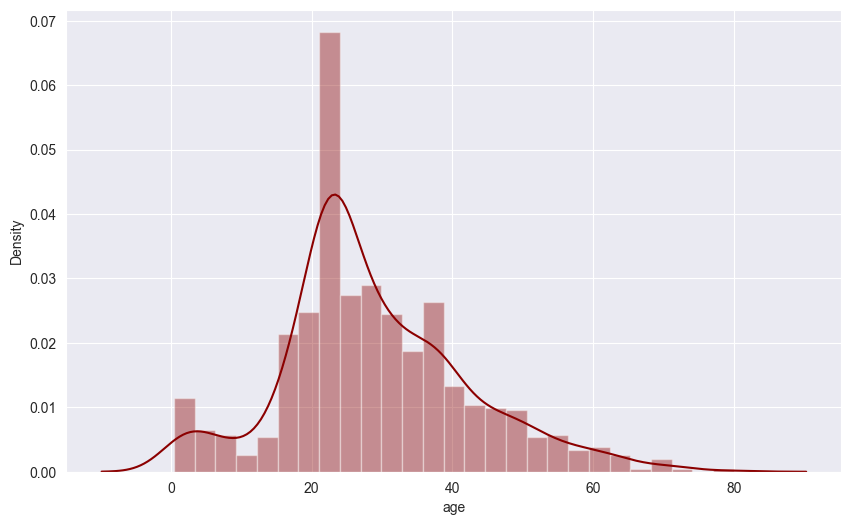

In [28]:
plt.figure(figsize = (10, 6))
sns.distplot(df["age"], color = "darkred")

<Axes: xlabel='fare', ylabel='Density'>

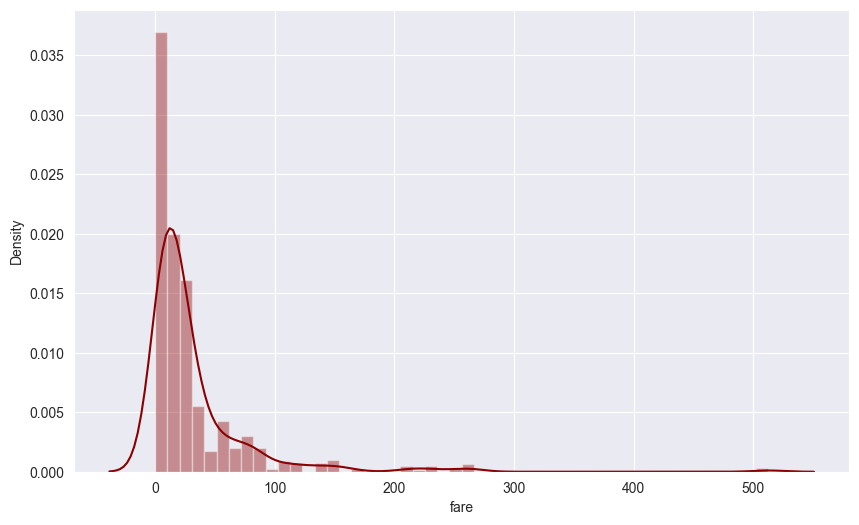

In [29]:
plt.figure(figsize = (10, 6))
sns.distplot(df["fare"], color = "darkred")

In [30]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)

In [31]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [32]:
sex = pd.get_dummies(df["sex"], drop_first = True)
who = pd.get_dummies(df["who"], drop_first = True)
adult_male = pd.get_dummies(df["adult_male"], drop_first = True)
embark_town = pd.get_dummies(df["embark_town"], drop_first = True)
alone = pd.get_dummies(df["alone"], drop_first = True)

In [33]:
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1)

In [34]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,True,True,False,True,False,True,False
1,1,1,female,71.2833,woman,False,Cherbourg,False,False,False,True,False,False,False,False
2,1,3,female,7.9250,woman,False,Southampton,True,False,False,True,False,False,True,True
3,1,1,female,53.1000,woman,False,Southampton,False,False,False,True,False,False,True,False
4,0,3,male,8.0500,man,True,Southampton,True,True,True,False,True,False,True,True


In [35]:
df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

In [36]:
df.head()

,survived,pclass,fare,male,man,woman,True,Queenstown,Southampton,True
0,0,3,7.2500,True,True,False,True,False,True,False
1,1,1,71.2833,False,False,True,False,False,False,False
2,1,3,7.9250,False,False,True,False,False,True,True
3,1,1,53.1000,False,False,True,False,False,True,False
4,0,3,8.0500,True,True,False,True,False,True,True


<Axes: >

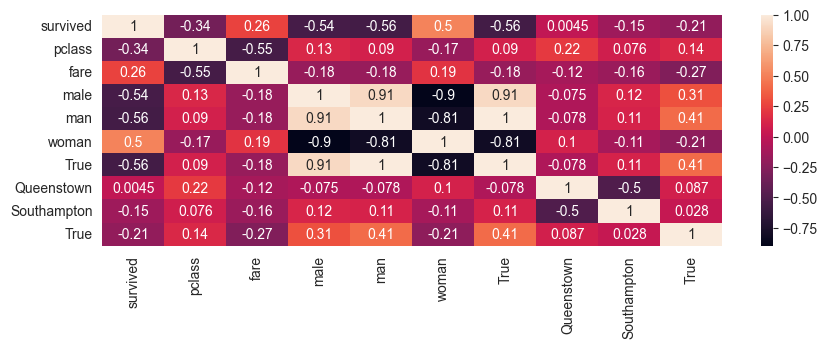

In [37]:
plt.figure(figsize = (10, 3))
sns.heatmap(df.corr(), annot = True) #will not work 

**Modelling** WIP

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop("survived", axis = 1)
X = X.rename(str,axis="columns") #needed to fix an error with column names
y = df["survived"]
X.head()

,pclass,fare,male,man,woman,True,Queenstown,Southampton,True
0,3,7.2500,True,True,False,True,False,True,False
1,1,71.2833,False,False,True,False,False,False,False
2,3,7.9250,False,False,True,False,False,True,True
3,1,53.1000,False,False,True,False,False,True,False
4,3,8.0500,True,True,False,True,False,True,True


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lm_model = LogisticRegression()

In [47]:
lm_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
lm_model.intercept_

array([3.91318232])

In [49]:
coef_param = pd.DataFrame(lm_model.coef_, index = X.columns, columns = ["Coefficient"])
coef_param

ValueError: Shape of passed values is (1, 9), indices imply (9, 1)

In [50]:
y_pred = lm_model.predict(X_test)

In [51]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [52]:
compare.sample(10)

,Actual,Pred
835,1,1
842,1,1
405,0,0
87,0,0
276,0,1
537,1,1
360,0,0
870,0,0
782,0,0
30,0,1


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    return print("r2_score:", SCORE, "\n","mae:", MAE, "\n","mse:",MSE, "\n","rmse:",RMSE)

In [55]:
evaluation_metrics(y_test, y_pred)

r2_score: 0.11518708730741023 
 mae: 0.20149253731343283 
 mse: 0.20149253731343283 
 rmse: 0.4488792012484348


In [56]:
!pip install yellowbrick

In [57]:
from yellowbrick.regressor import PredictionError

# Instantiate the visualizer
visualizer = PredictionError(lm_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show() # Finalize and render the figure

YellowbrickTypeError: This estimator is not a regressor; try a classifier or clustering score visualizer instead!

In [ ]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the visualizer
visualizer = ResidualsPlot(lm_model)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data

visualizer.show() # Finalize and render the figure

In [ ]:
lr_model = LogisticRegression()

In [58]:
lr_model.fit(X_train, y_train)

NameError: name 'lr_model' is not defined

In [59]:
y_pred = lr_model.predict(X_test)
y_pred

NameError: name 'lr_model' is not defined

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        87
           1       0.69      0.79      0.73        47

    accuracy                           0.80       134
   macro avg       0.78      0.80      0.79       134
weighted avg       0.81      0.80      0.80       134



In [62]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [63]:
cnf_matrix

array([[70, 17],
       [10, 37]])

In [64]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [65]:
compare.sample(10)

,Actual,Pred
737,1,0
466,0,0
44,1,1
531,0,0
397,0,0
448,1,1
405,0,0
836,0,0
528,0,0
869,1,0
